<a href="https://colab.research.google.com/github/Heather-bu/bme3053c/blob/main/supervised_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys

    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset


In [ ]:
#Provide your code for part 1-1 here
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [ ]:
#Provide your code for part 1-2 here
print(f"Dataset dimensions: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")

Dataset dimensions: (70000, 784)
Number of samples: 70000
Number of features: 784
Number of classes: 10
Classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


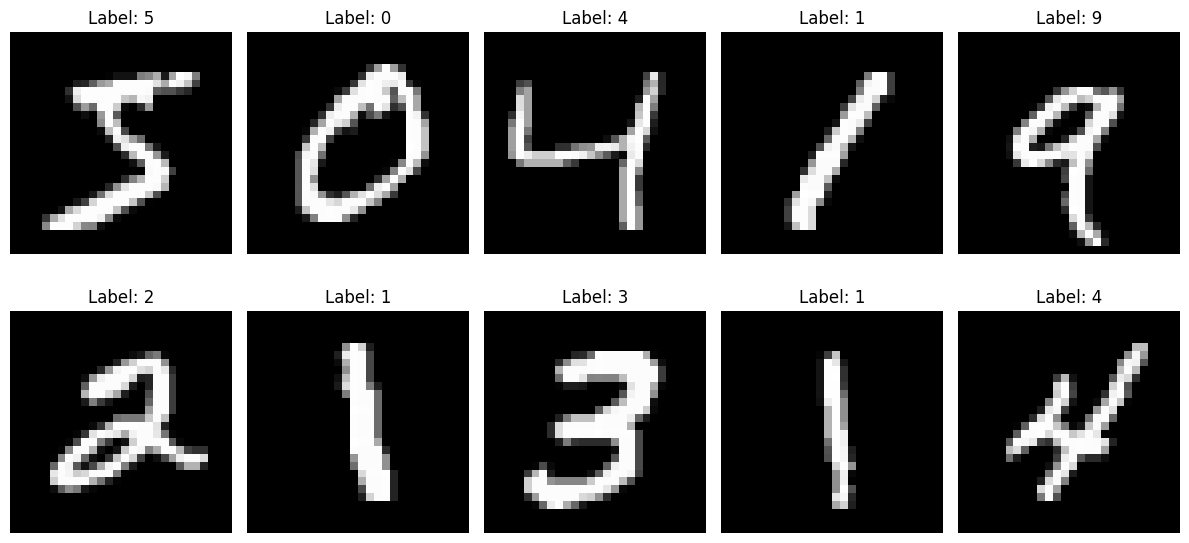

In [ ]:
#Provide your code for part 1-3 here
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    # Reshape from 1D to 2D (28x28 pixels)
    img = X[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets


In [ ]:
# Provide your code for part 2 here
# Scale pixel values to [0,1]
X = X / 255.0

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes of resulting sets
print("Training set shape:", X_train_scaled.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", X_test_scaled.shape)
print("Test labels shape:", y_test.shape)

Training set shape: (56000, 784)
Training labels shape: (56000,)
Test set shape: (14000, 784)
Test labels shape: (14000,)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [ ]:
# Provide your code for part 3-1 here
# Part 3-1: Logistic Regression
# Train logistic regression model
lr_model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
lr_model.fit(X_train_scaled, y_train)

# Get predictions and accuracy
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")



Logistic Regression Accuracy: 0.9156


In [ ]:
# Provide your code for part 3-2 here
# Part 3-2: Neural Network
# Create and train neural network model
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    solver='adam',
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
)
nn_model.fit(X_train_scaled, y_train)

# Get predictions and accuracy
nn_predictions = nn_model.predict(X_test_scaled)
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.9670


### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models


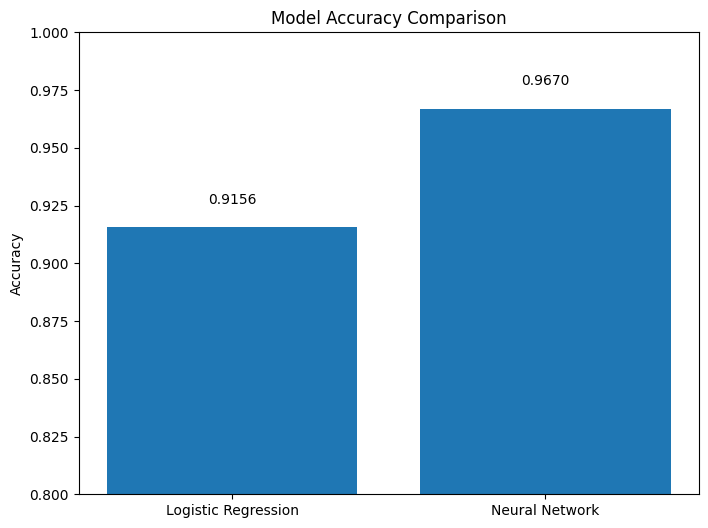

In [ ]:
# Provide your code for part 4-1 here
# Part 4-1: Bar plot comparing model accuracies
accuracies = {
    'Logistic Regression': lr_accuracy,
    'Neural Network': nn_accuracy
}

plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Adjust y-axis for better visualization
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.99      0.97      0.98      1

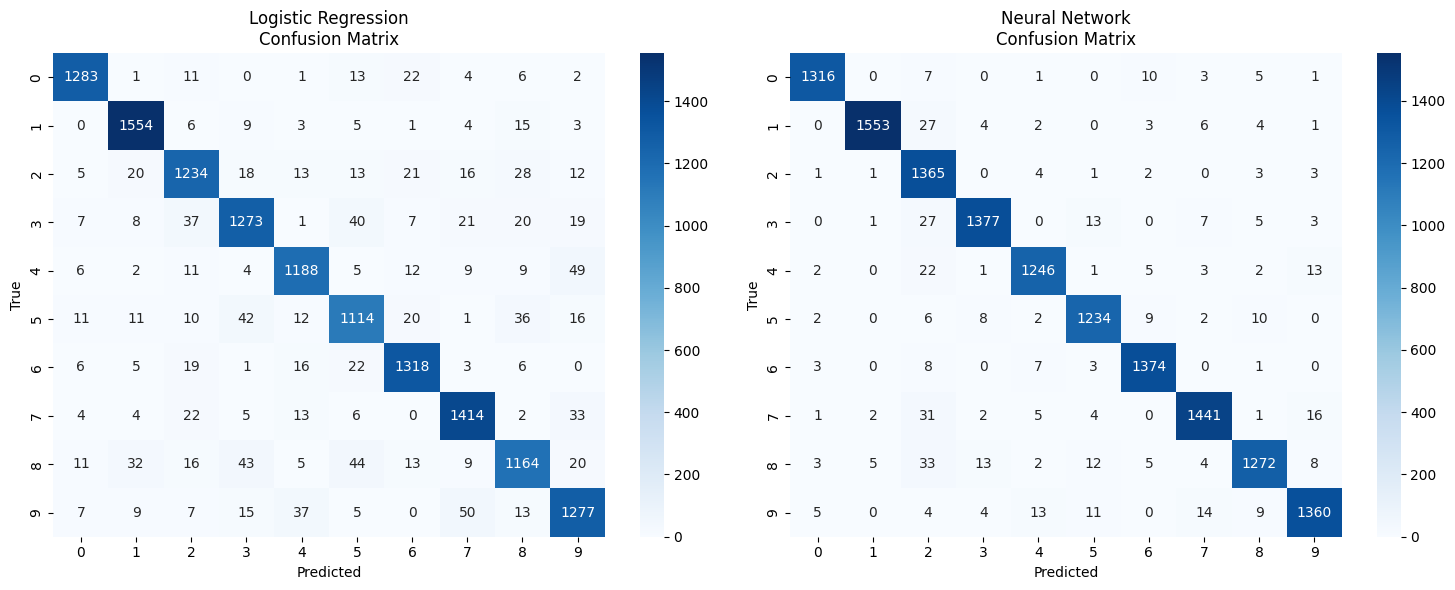

In [ ]:
# Provide your code for part 4-2 here
# Part 4-2: Classification reports and confusion matrices
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))
print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Logistic Regression confusion matrix
sns.heatmap(confusion_matrix(y_test, lr_predictions),
            annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('Logistic Regression\nConfusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

# Neural Network confusion matrix
sns.heatmap(confusion_matrix(y_test, nn_predictions),
            annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title('Neural Network\nConfusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

plt.tight_layout()
plt.show()

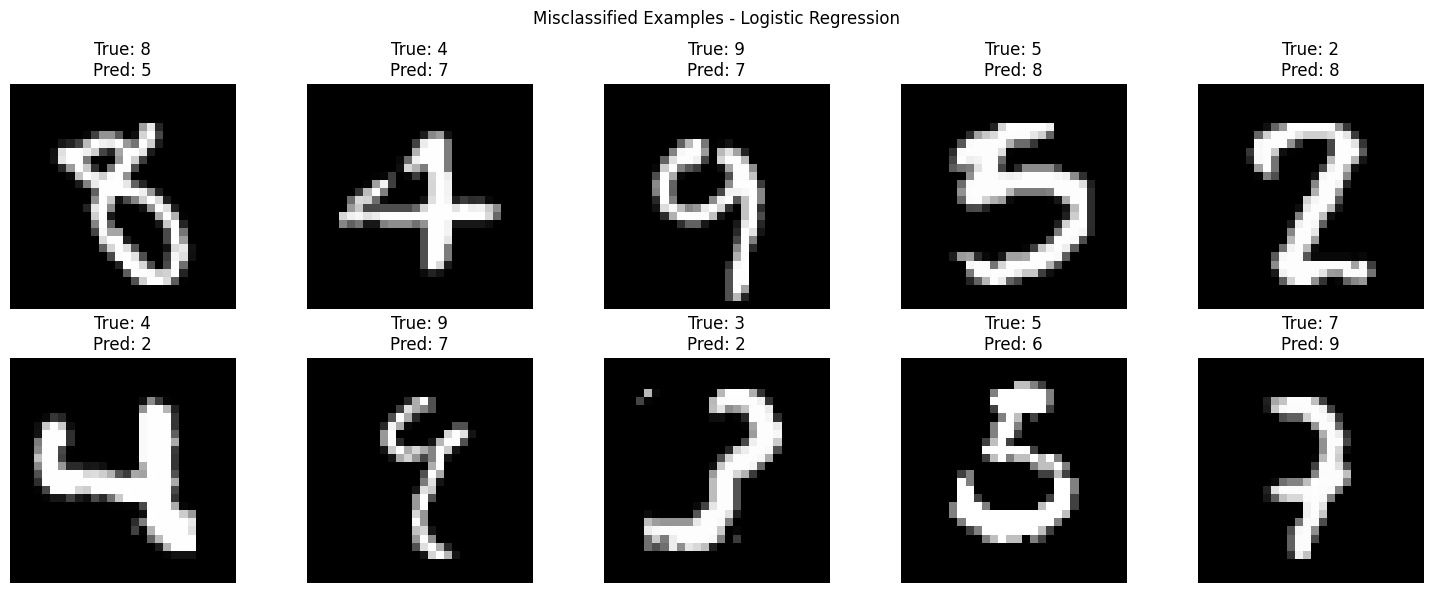

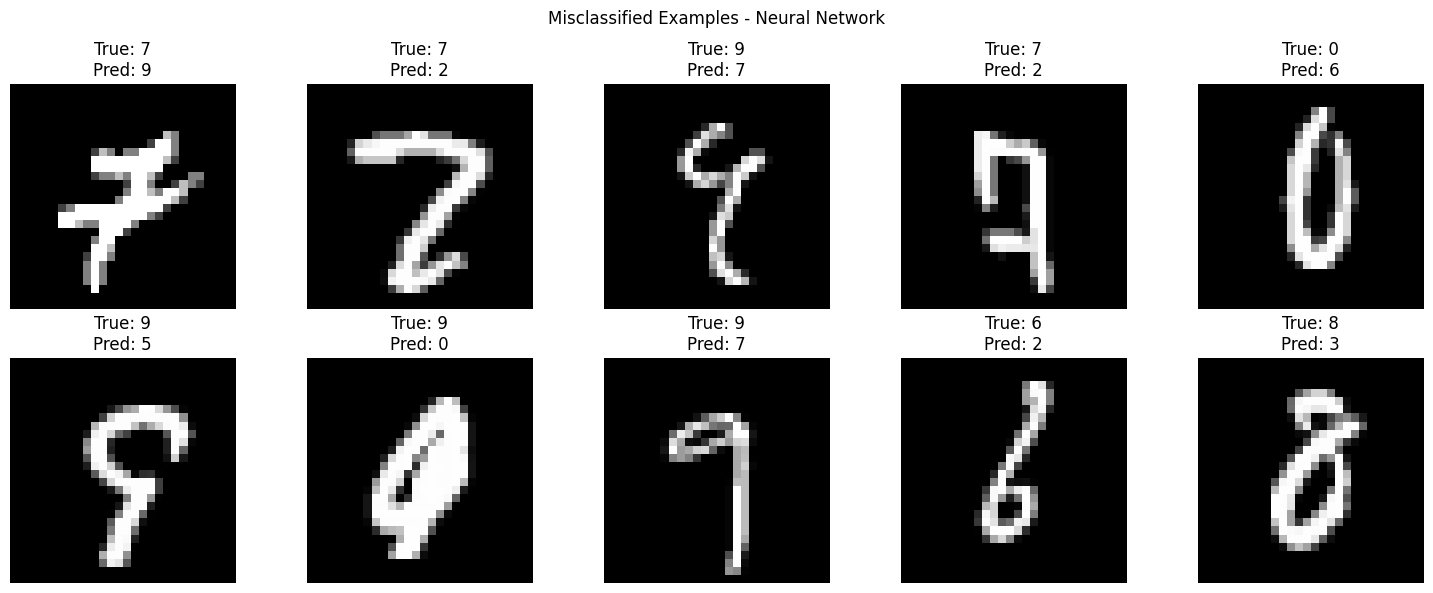

In [ ]:
# Provide your code for part 4-3 here
# Part 4-3: Visualize misclassified examples
def plot_misclassified(X_test, y_test, predictions, model_name):
    misclassified_idx = np.where(predictions != y_test)[0]

    # Select first 10 misclassified examples
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle(f'Misclassified Examples - {model_name}')

    for i, ax in enumerate(axes.flat):
        if i < len(misclassified_idx):
            idx = misclassified_idx[i]
            img = X_test[idx].reshape(28, 28)
            ax.imshow(img, cmap='gray')
            ax.set_title(f'True: {y_test[idx]}\nPred: {predictions[idx]}')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Plot misclassified examples for both models
plot_misclassified(X_test, y_test, lr_predictions, "Logistic Regression")
plot_misclassified(X_test, y_test, nn_predictions, "Neural Network")